## Business Objective

We need to help the CEO of HELP International, an international humanitarian NGO, in the process of selection of countries they should focus on. The selection will be based on some socio-economic and health factors that determine the overall development of the country.

In other words, it is required to cluster the countries by the factors mentioned above and then present our solution and recommendations to the CEO. We are also supposed to use dimensionality reduction using PCA to get the visualizations of the clusters in a 2-D form.

## Importing necessary modules

In [1]:
#importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan


pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading the Data set

In [3]:
# Reading the dataset
df=pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Reading the dataset
df1=pd.read_csv("data-dictionary+.csv")
df1.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [5]:
df.shape

(167, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
df.count()

country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

In [9]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Summary:

There are 167 rows and 10 columns in dataframe
These 10 columns comprises of measures (numeric value) except the contry name, which anyways is going to be the output column
The dataset is clean, i.e. no missing/null values

## Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

Visualising Numeric Variables
Let's make a boxplot of all the numeric variables

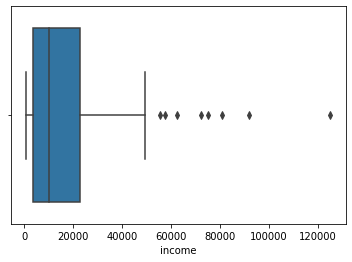

In [11]:
sns.boxplot(x=df['income'])

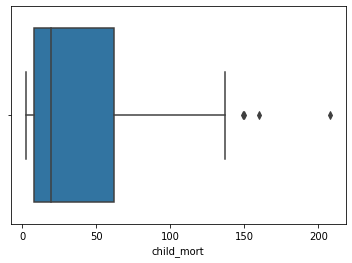

In [12]:
sns.boxplot(x=df['child_mort'])

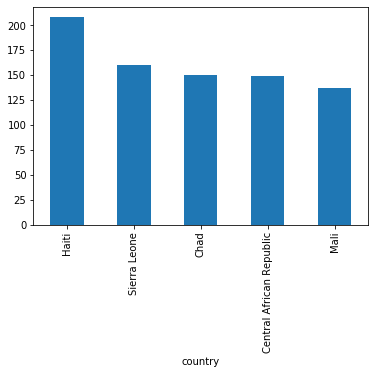

In [13]:
df.groupby(by=["country"])["child_mort"].sum().sort_values(ascending=False).iloc[:5].plot(kind="bar")

### From above plot it is clear that the Haiti, Sierra Leone, Chad, African Republic have high mortality rate .

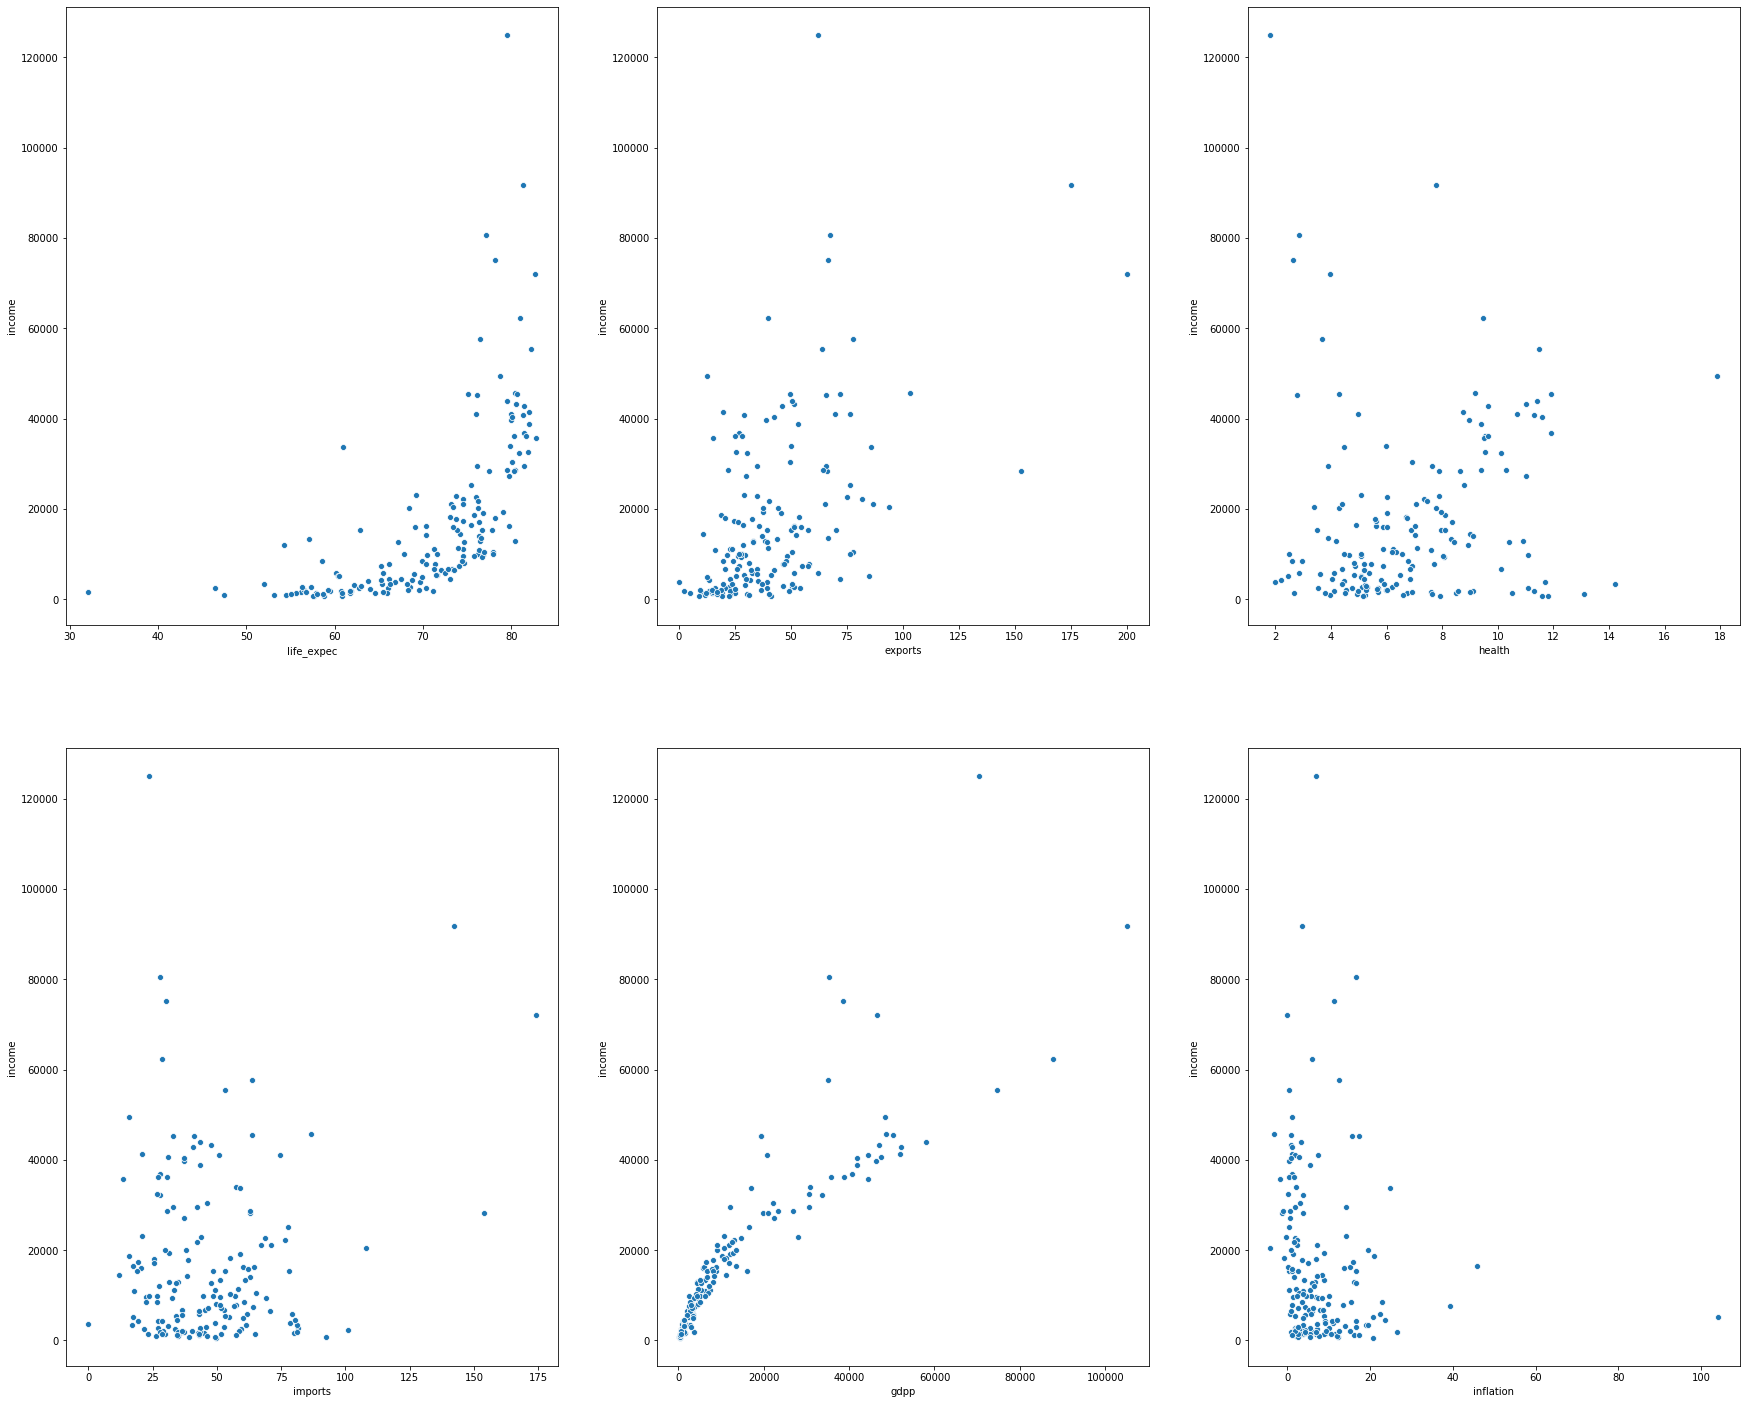

In [14]:
plt.figure(figsize=(30, 25))
plt.subplot(2,3,1)
sns.scatterplot(x = 'life_expec', y = 'income', data = df)
plt.subplot(2,3,2)
sns.scatterplot(x = 'exports', y = 'income', data = df)
plt.subplot(2,3,3)
sns.scatterplot(x = 'health', y = 'income', data = df)
plt.subplot(2,3,4)
sns.scatterplot(x = 'imports', y = 'income', data = df)
plt.subplot(2,3,5)
sns.scatterplot(x = 'gdpp', y = 'income', data = df)
plt.subplot(2,3,6)
sns.scatterplot(x = 'inflation', y = 'income', data = df)
plt.show()

### The above plots showing the correlation of various variable with income of country. High income country show the high correlation with above variables, and low income low correlation with above variouse variables vise-varsa..

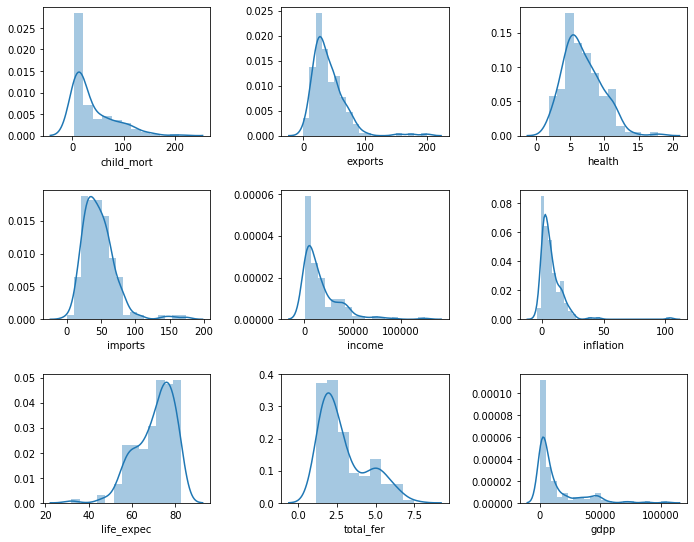

In [15]:
# to plot a distplot
import matplotlib.pyplot as plt
var = df.select_dtypes(exclude='object').columns
col = 3
row = len(var)/col+1

plt.figure(figsize=(10,10))
for i in enumerate(var):
    plt.subplot(row,col,i[0]+1)
    sns.distplot(df[i[1]])
    plt.tight_layout(pad = 2)
plt.show()

In [16]:
var = df.select_dtypes(exclude='object').columns
var

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

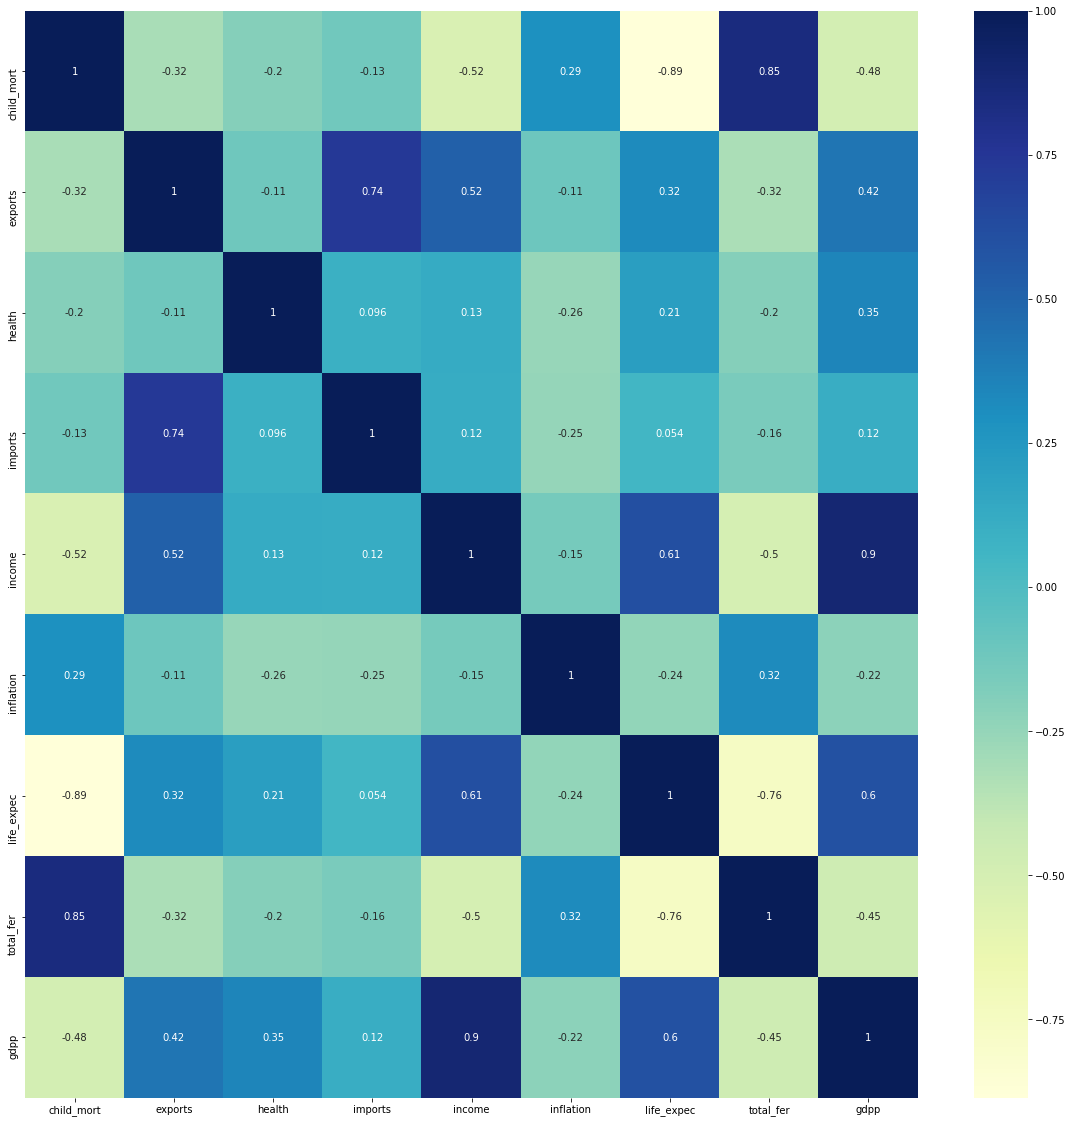

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Here we can see the Income, Life_expectency are majorly affecting a countries GDP


In [18]:
# Lets convert the %age Columns to its actual values
df["exports"] = df["exports"]*df["gdpp"]/100
df["health"] = df["health"]*df["gdpp"]/100
df["imports"] = df["imports"]*df["gdpp"]/100
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


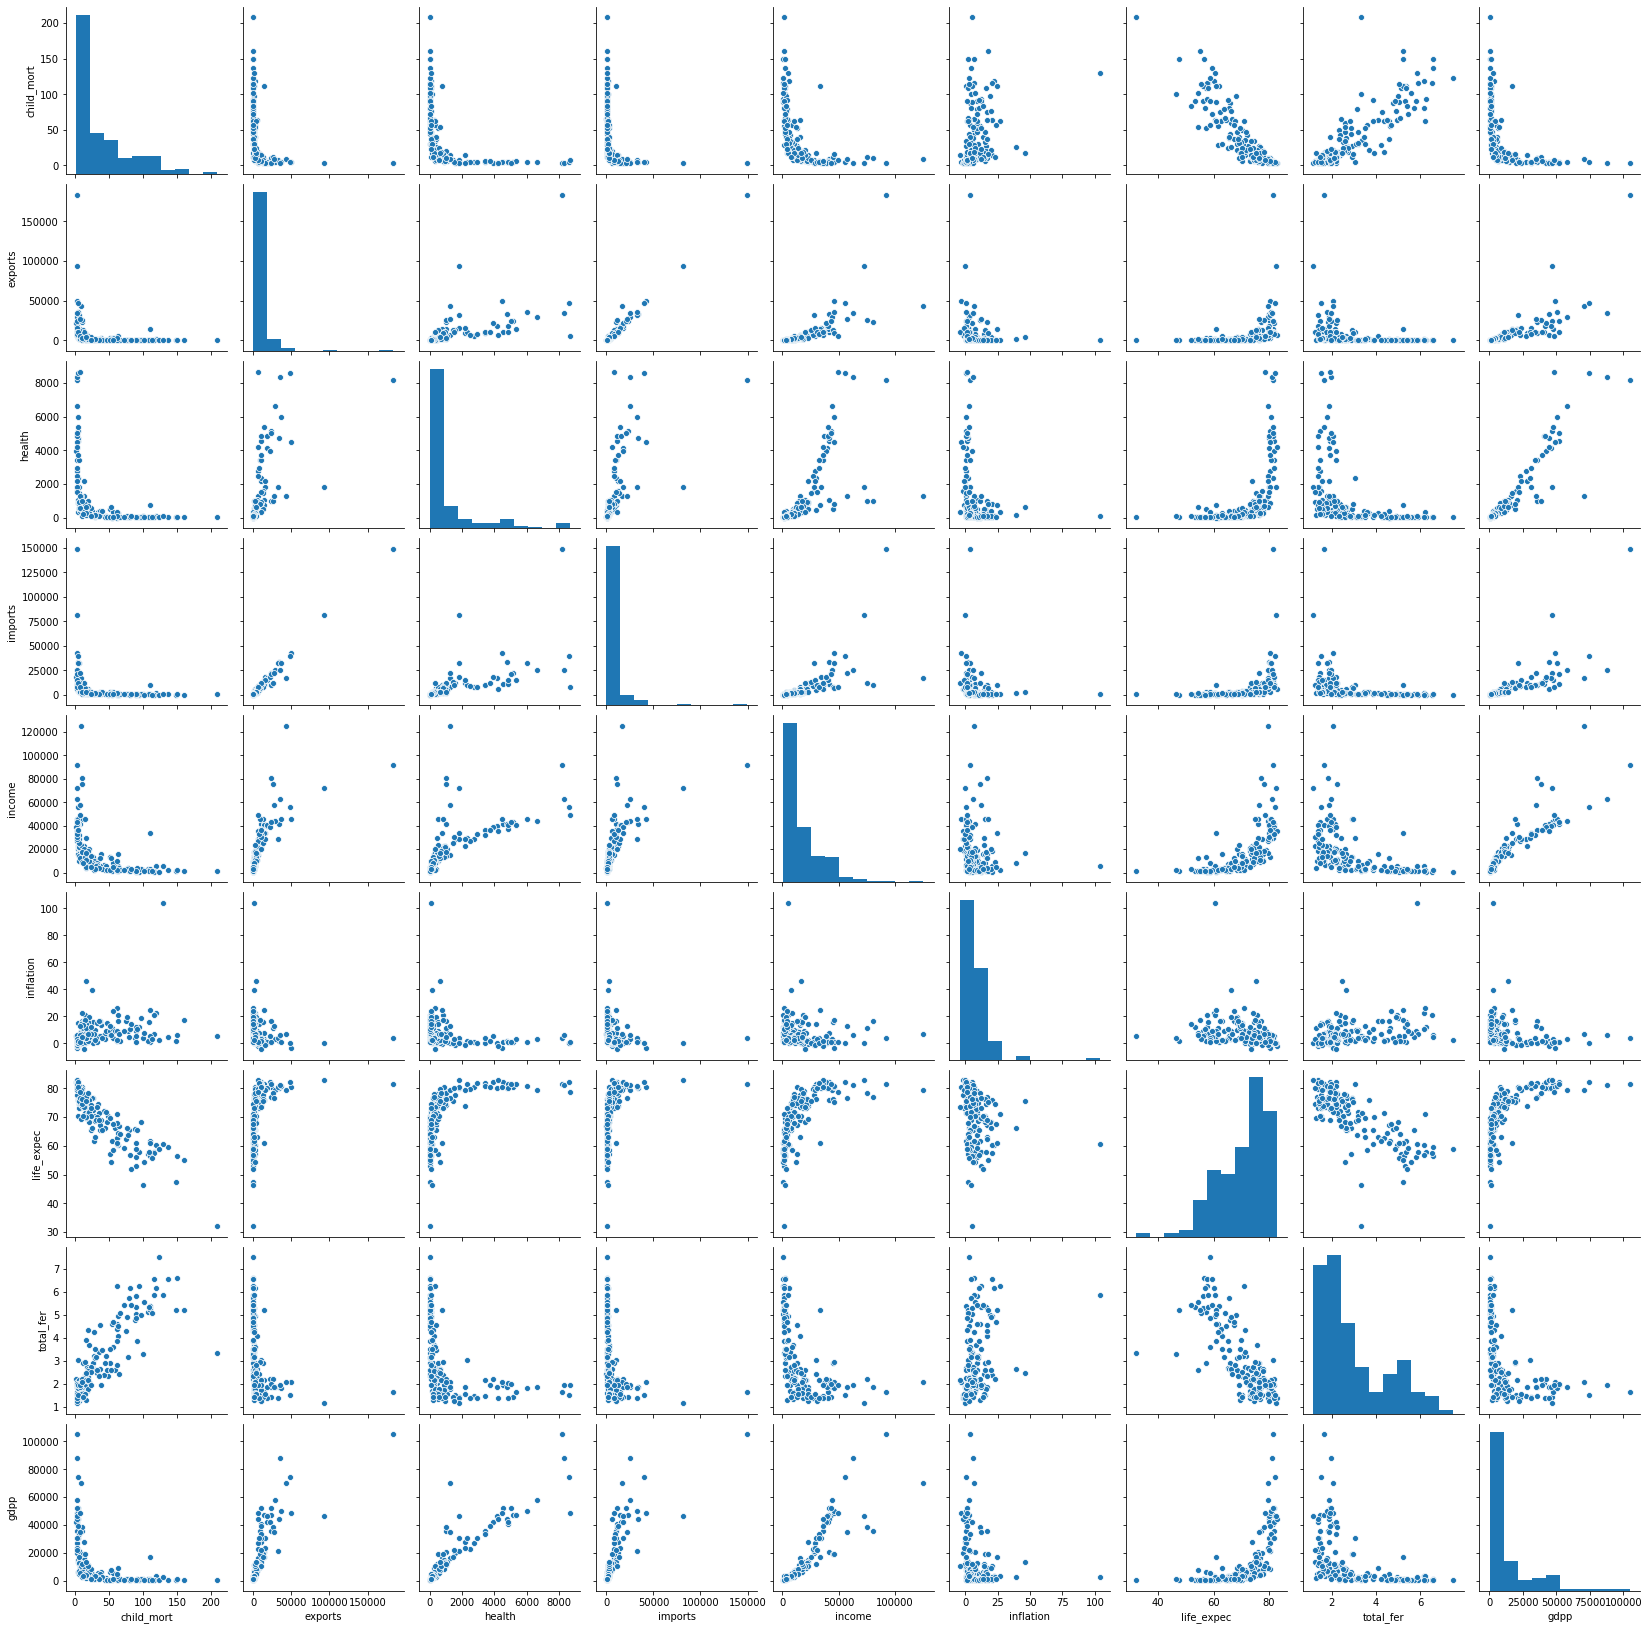

In [19]:
sns.pairplot(df)
plt.show()

## Outlier Analysis and Treatment

In [20]:
df_country_drop = df.copy()
country = df_country_drop.pop('country')
num_cols =  df.select_dtypes(exclude = ['object']).columns

In [21]:
# scaling

scaler = StandardScaler()
country_scaled = scaler.fit_transform(df_country_drop)

In [22]:
df_country_scaled = pd.DataFrame(country_scaled, columns=num_cols, index=country)

In [23]:
# choosing only important columns

df_final = df_country_scaled[["gdpp", "child_mort", "income"]]
df_final.insert(0, value=df_final.index, column="country")
df_final = df_final.reset_index(drop=True)
df_final.head()

,country,gdpp,child_mort,income
0,Afghanistan,-0.679180,1.291532,-0.808245
1,Albania,-0.485623,-0.538949,-0.375369
2,Algeria,-0.465376,-0.272833,-0.220844
3,Angola,-0.516268,2.007808,-0.585043
4,Antigua and Barbuda,-0.041817,-0.695634,0.101732


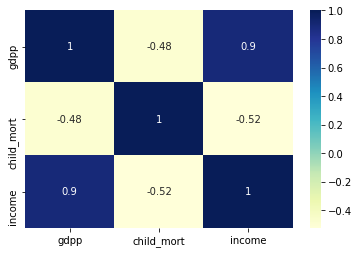

In [24]:
sns.heatmap(df_final.corr(),annot = True,cmap="YlGnBu")

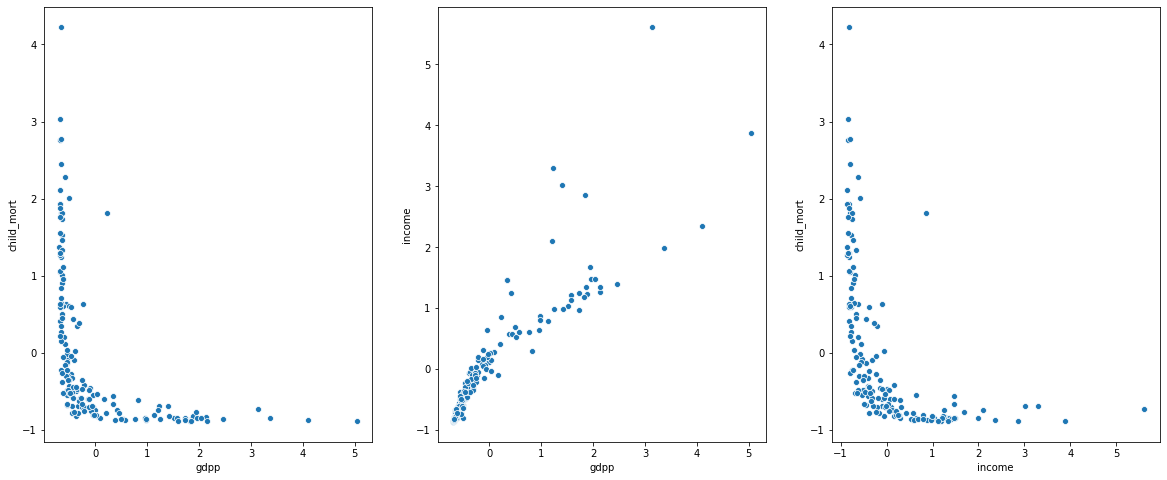

In [25]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(data=df_final, x='gdpp', y='child_mort')
plt.subplot(1,3,2)
sns.scatterplot(data=df_final, x='gdpp', y='income')
plt.subplot(1,3,3)
sns.scatterplot(data=df_final, x='income', y='child_mort')
plt.show()

### We can clearly see above that, child_mortality and gdp_per_capita and income have a hyperbolic relationship. Clearly more affluent countries will have better healthcare facilities and therefore low child_mortality

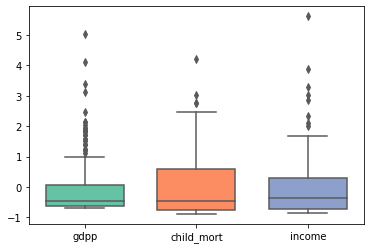

In [26]:
# Outlier analysis

# Plot before outlier removal

sns.boxplot(data = df_final, orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.show()

In [27]:
# Statstical Outlier treatment for gdpp

Q1 = df_final.gdpp.quantile(0.05)
Q3 = df_final.gdpp.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.gdpp >= Q1) & (df_final.gdpp <= Q3)]

# Statstical Outlier treatment for child_mort

Q1 = df_final.child_mort.quantile(0.05)
Q3 = df_final.child_mort.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.child_mort >= Q1) & (df_final.child_mort <= Q3)]

# Statstical Outlier treatment for income

Q1 = df_final.income.quantile(0.05)
Q3 = df_final.income.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.income >= Q1) & (df_final.income <= Q3)]

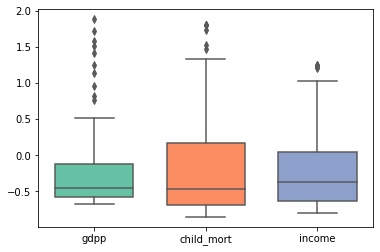

In [28]:
# Plot after Outlier removal

sns.boxplot(data = df_final, orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)

In [29]:
# Reindexing the df after outlier removal
df_final = df_final.reset_index(drop=True)

# 3. Preparing the data

## Hopkins Statistics

##### Used to determine if we can create clusters


##### running hopkins statistics on a copied scaled dataframe.

In [30]:

 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
round(hopkins(df_final[["gdpp", "child_mort", "income"]]), 3)

0.872

**Inference:**
0.918 is a significant Hopkins score for Clustering.

### We can see that this gives a go ahead to cluster our data
## 4. Kmeans Clustering
### Lets create a seperate dataframe only for kmeans


In [32]:
df_kmeans = df_final
df_kmeans = df_kmeans.set_index("country", drop=True)
df_kmeans.head()

,gdpp,child_mort,income
country,,,
Albania,-0.485623,-0.538949,-0.375369
Algeria,-0.465376,-0.272833,-0.220844
Antigua and Barbuda,-0.041817,-0.695634,0.101732
Argentina,-0.145791,-0.591177,0.080920
Armenia,-0.533233,-0.501643,-0.543421


In [33]:
#Lets start with a random number of clusters
kmeans = KMeans(n_clusters=3, max_iter=60)
kmeans.fit(df_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=60,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 0, 0])

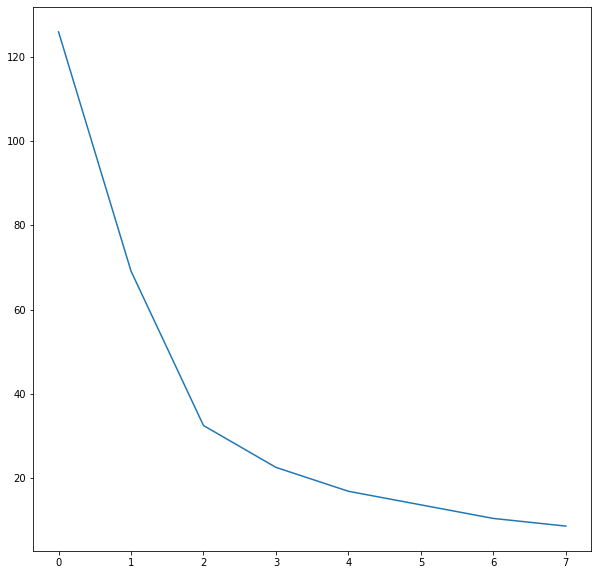

In [35]:
#lets find the optimum number of clusters
# elbow-curve/SSD
ssd = []
range_n_clusters = [1,2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_kmeans)
    
    ssd.append(kmeans.inertia_)
plt.figure(figsize=[10,10])
plt.plot(ssd)

### Silhouette and Elbow Analysis

In [36]:
#sillhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_kmeans)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_kmeans, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.4281303236674302
For n_clusters=3, the silhouette score is 0.530306942331546
For n_clusters=4, the silhouette score is 0.4427120721903767
For n_clusters=5, the silhouette score is 0.4620818227016914
For n_clusters=6, the silhouette score is 0.44300316863479156
For n_clusters=7, the silhouette score is 0.41306312904074644
For n_clusters=8, the silhouette score is 0.42176642904233186


In [37]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=60)
kmeans.fit(df_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=60,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 2, 2])

In [39]:
# Assign the label

df_kmeans['Cluster_Id3'] = kmeans.labels_
df_kmeans.head()

,gdpp,child_mort,income,Cluster_Id3
country,,,,
Albania,-0.485623,-0.538949,-0.375369,0
Algeria,-0.465376,-0.272833,-0.220844,0
Antigua and Barbuda,-0.041817,-0.695634,0.101732,0
Argentina,-0.145791,-0.591177,0.080920,0
Armenia,-0.533233,-0.501643,-0.543421,0


In [40]:
df_kmeans.Cluster_Id3.value_counts()

0    74
2    32
1    14
Name: Cluster_Id3, dtype: int64

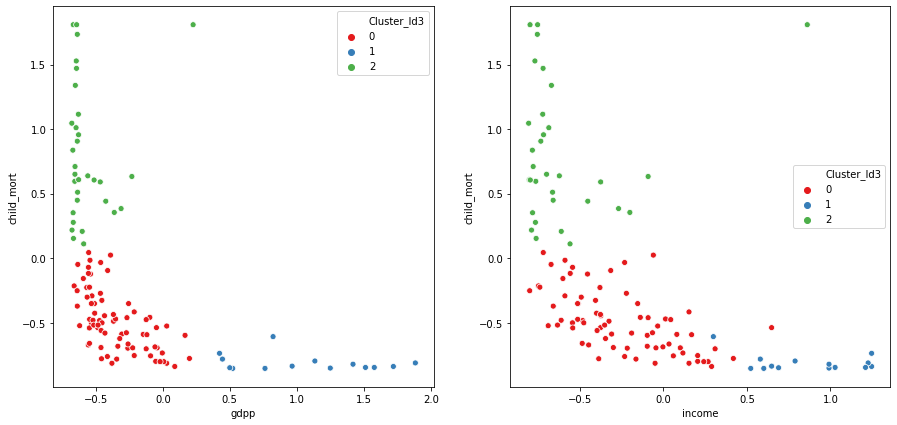

In [41]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,7))

sns.scatterplot(x='gdpp',y='child_mort',hue='Cluster_Id3',legend='full',palette="Set1",data=df_kmeans,ax=axes[0])
sns.scatterplot(x='income',y='child_mort',hue='Cluster_Id3',legend='full',palette="Set1",data=df_kmeans,ax=axes[1])
plt.show()

**Inference:**
We notice that the cluster grouping seems quite clear and compact when "child_mort" is involved, since "gdpp" and "income" have very high correlation. We can proceed with this.

**From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. We will proceed with analyzing these 3 components to build some meaningful clusters. The number of clusters = 3 also seems fine**

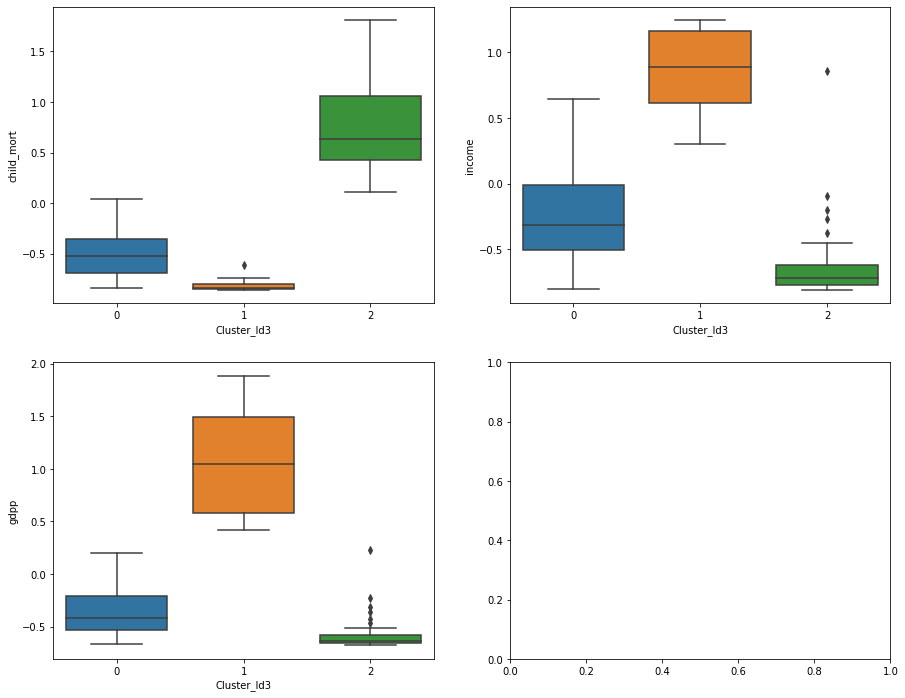

In [42]:
# Box plot on Child_Mortality, Income, Gdpp to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id3', y = 'child_mort', data = df_kmeans,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id3', y = 'income', data = df_kmeans,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id3', y = 'gdpp', data=df_kmeans,ax=axes[1][0])
plt.show()

**Inference:**
1. Child Mortality is highest for Cluster 0.This cluster need most aid.
2. Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 0. Hence, these countries need help.

In [43]:
# List of countries in Cluster 0

df_kmeans[df_kmeans['Cluster_Id3']==0]

,gdpp,child_mort,income,Cluster_Id3
country,,,,
Albania,-0.485623,-0.538949,-0.375369,0
Algeria,-0.465376,-0.272833,-0.220844,0
Antigua and Barbuda,-0.041817,-0.695634,0.101732,0
Argentina,-0.145791,-0.591177,0.080920,0
Armenia,-0.533233,-0.501643,-0.543421,0
Azerbaijan,-0.389857,0.023128,-0.059556,0
Barbados,0.166131,-0.598639,-0.095976,0
Belarus,-0.379460,-0.815013,-0.049151,0
Belize,-0.471942,-0.484233,-0.482027,0


### Trying Kmeans with 4 clusters

In [44]:
df_kmeans = df_kmeans.drop(["Cluster_Id3"], axis=1)

In [45]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=60)
kmeans.fit(df_kmeans)

# Assign the label

df_kmeans['Cluster_Id4'] = kmeans.labels_
df_kmeans.head()

,gdpp,child_mort,income,Cluster_Id4
country,,,,
Albania,-0.485623,-0.538949,-0.375369,1
Algeria,-0.465376,-0.272833,-0.220844,1
Antigua and Barbuda,-0.041817,-0.695634,0.101732,0
Argentina,-0.145791,-0.591177,0.080920,0
Armenia,-0.533233,-0.501643,-0.543421,1


In [46]:
df_kmeans.Cluster_Id4.value_counts()

1    45
0    36
3    25
2    14
Name: Cluster_Id4, dtype: int64

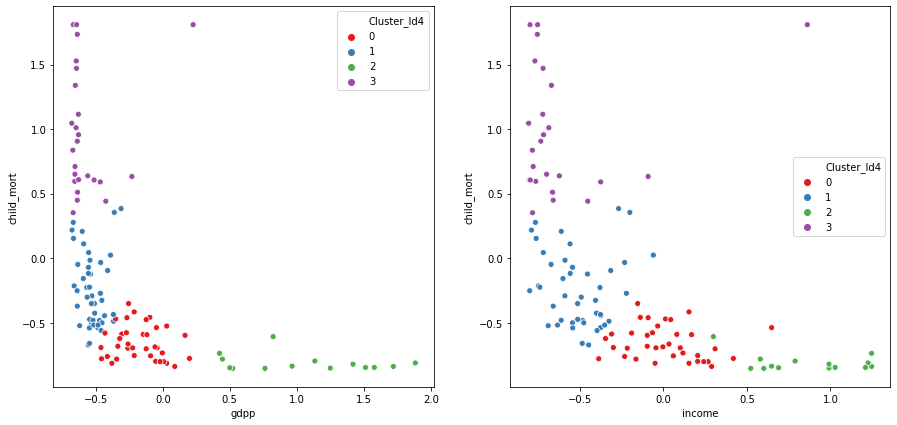

In [47]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,7))

sns.scatterplot(x='gdpp',y='child_mort',hue='Cluster_Id4',legend='full',palette="Set1",data=df_kmeans,ax=axes[0])
sns.scatterplot(x='income',y='child_mort',hue='Cluster_Id4',legend='full',palette="Set1",data=df_kmeans,ax=axes[1])
plt.show()

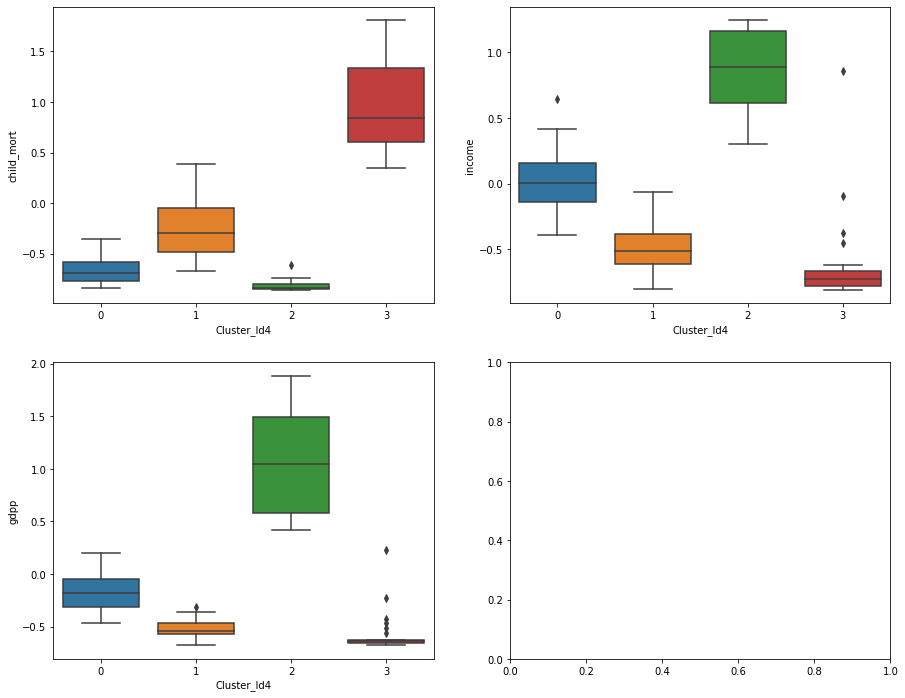

In [48]:
# Box plot on Child_Mortality, Income, Gdpp to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id4', y = 'child_mort', data = df_kmeans,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id4', y = 'income', data = df_kmeans,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id4', y = 'gdpp', data=df_kmeans,ax=axes[1][0])
plt.show()

**Inference:**
1. Child Mortality is highest for Cluster 0.This cluster need most aid.
2. Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 0. Hence, these countries need help.

In [49]:
# List of countries in Cluster 0

df_kmeans[df_kmeans['Cluster_Id4']==0]

,gdpp,child_mort,income,Cluster_Id4
country,,,,
Antigua and Barbuda,-0.041817,-0.695634,0.101732,0
Argentina,-0.145791,-0.591177,0.080920,0
Barbados,0.166131,-0.598639,-0.095976,0
Belarus,-0.379460,-0.815013,-0.049151,0
Bosnia and Herzegovina,-0.457167,-0.780194,-0.386295,0
Brazil,-0.096540,-0.459363,-0.137599,0
Bulgaria,-0.335134,-0.683199,-0.095976,0
Chile,-0.003511,-0.735427,0.117340,0
Costa Rica,-0.260710,-0.698121,-0.215642,0


### Trying Kmeans with 5 clusters

In [50]:
df_kmeans = df_kmeans.drop(["Cluster_Id4"], axis=1)

In [51]:
# final model with k=5
kmeans = KMeans(n_clusters=5, max_iter=60)
kmeans.fit(df_kmeans)

# Assign the label

df_kmeans['Cluster_Id5'] = kmeans.labels_
df_kmeans.head()

,gdpp,child_mort,income,Cluster_Id5
country,,,,
Albania,-0.485623,-0.538949,-0.375369,4
Algeria,-0.465376,-0.272833,-0.220844,4
Antigua and Barbuda,-0.041817,-0.695634,0.101732,1
Argentina,-0.145791,-0.591177,0.080920,1
Armenia,-0.533233,-0.501643,-0.543421,4


In [52]:
df_kmeans.Cluster_Id5.value_counts()

4    44
1    30
0    24
2    14
3     8
Name: Cluster_Id5, dtype: int64

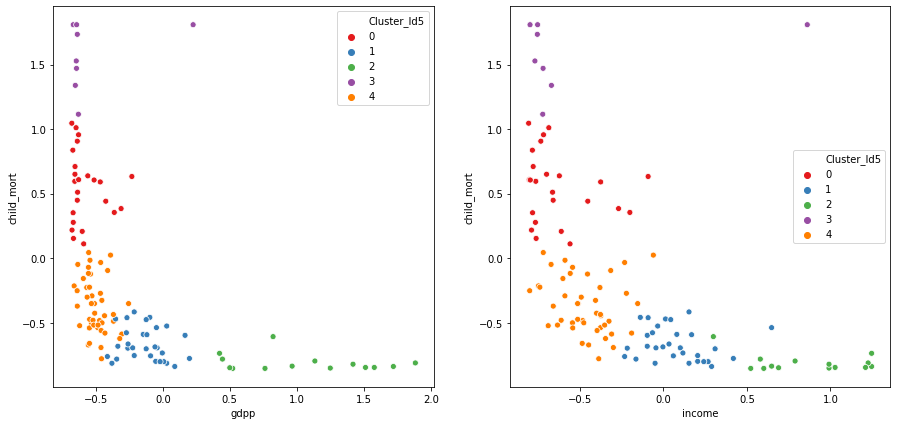

In [53]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,7))

sns.scatterplot(x='gdpp',y='child_mort',hue='Cluster_Id5',legend='full',palette="Set1",data=df_kmeans,ax=axes[0])
sns.scatterplot(x='income',y='child_mort',hue='Cluster_Id5',legend='full',palette="Set1",data=df_kmeans,ax=axes[1])
plt.show()

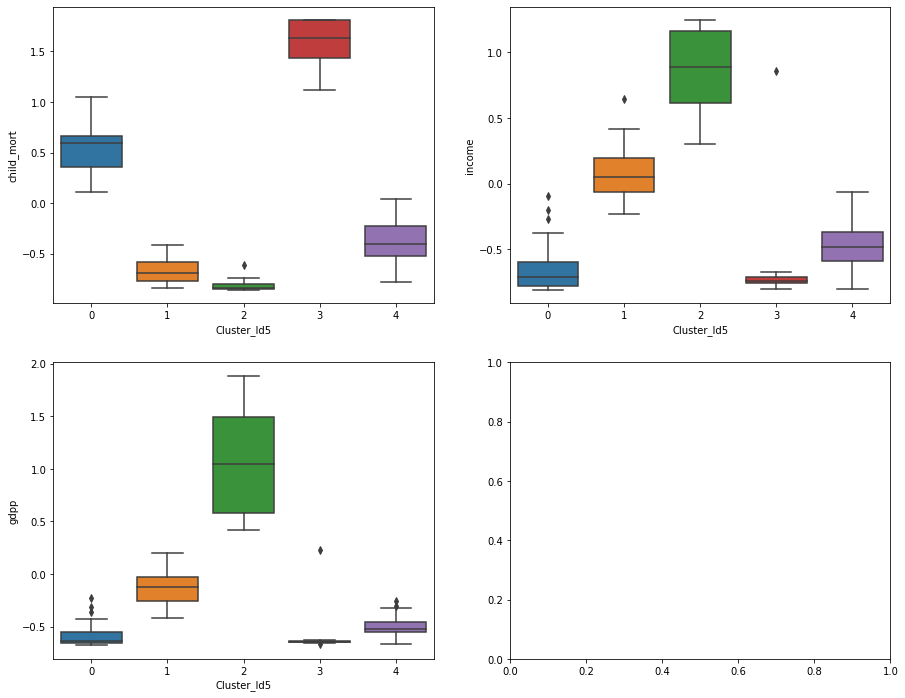

In [54]:
# Box plot on Child_Mortality, Income, Gdpp to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id5', y = 'child_mort', data = df_kmeans,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id5', y = 'income', data = df_kmeans,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id5', y = 'gdpp', data=df_kmeans,ax=axes[1][0])
plt.show()

**Inference:**
1. Child Mortality is highest for Cluster 0, 4 and 3. These cluster need most aid.
2. Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 0, 4 and 3. Hence, these countries need help.

In [55]:
# List of countries in Cluster 0

df_kmeans[df_kmeans['Cluster_Id5']==0]

,gdpp,child_mort,income,Cluster_Id5
country,,,,
Bangladesh,-0.667961,0.276809,-0.765062,0
Bhutan,-0.590145,0.110176,-0.557989,0
Bolivia,-0.601089,0.207171,-0.610537,0
Botswana,-0.361949,0.353908,-0.200033,0
Cambodia,-0.666429,0.152456,-0.760900,0
"Congo, Rep.",-0.559500,0.637434,-0.621984,0
Gabon,-0.230613,0.632460,-0.090773,0
Gambia,-0.678687,1.045313,-0.805644,0
Ghana,-0.637754,0.906037,-0.732804,0


In [56]:
# List of countries in Cluster 4

df_kmeans[df_kmeans['Cluster_Id5']==4]

,gdpp,child_mort,income,Cluster_Id5
country,,,,
Albania,-0.485623,-0.538949,-0.375369,4
Algeria,-0.465376,-0.272833,-0.220844,4
Armenia,-0.533233,-0.501643,-0.543421,4
Azerbaijan,-0.389857,0.023128,-0.059556,4
Belize,-0.471942,-0.484233,-0.482027,4
Bosnia and Herzegovina,-0.457167,-0.780194,-0.386295,4
Cape Verde,-0.528307,-0.292729,-0.588685,4
China,-0.459903,-0.561332,-0.396180,4
Colombia,-0.367421,-0.489208,-0.324901,4


In [57]:
# List of countries in Cluster 3

df_kmeans[df_kmeans['Cluster_Id5']==3]

,gdpp,child_mort,income,Cluster_Id5
country,,,,
Benin,-0.667961,1.808842,-0.797319,3
Cameroon,-0.637754,1.734230,-0.753616,3
Cote d'Ivoire,-0.642679,1.808842,-0.752055,3
Equatorial Guinea,0.226327,1.808842,0.861347,3
Lesotho,-0.645415,1.527804,-0.768184,3
Mauritania,-0.643774,1.470601,-0.719277,3
Pakistan,-0.652529,1.338787,-0.669330,3
Zambia,-0.629546,1.114951,-0.721358,3


**Inference:**
Cluster_number = 5 seems most apt as it focuses on countries with greater need of aid.

**Business aspect:**
The group is small but, our raised fund is also small, therefore we should prioritize among countries with greater child mortality rates and with lower gdp per capita and also lower overall incomes. 

In [58]:
# Merging the df_kmeans with original df

df_merge_kmeans = pd.merge(df ,df_kmeans,on='country', how="inner")
df_merge_kmeans = df_merge_kmeans.drop(["gdpp_y", "child_mort_y", "income_y"], axis=1)
df_merge_kmeans.columns = ['country','child_mort','exports','health','imports',
                            'income','inflation','life_expec','total_fer','gdpp','Cluster_Id']
df_merge_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,4
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,4
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,1
3,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300,1
4,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,4
5,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,4
6,Bahamas,13.8,9800.00,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,2
7,Bahrain,8.6,14386.50,1028.7900,10536.300,41100,7.440,76.0,2.16,20700,2
8,Bangladesh,49.4,121.28,26.6816,165.244,2440,7.140,70.4,2.33,758,0
9,Barbados,14.2,6320.00,1275.2000,7792.000,15300,0.321,76.7,1.78,16000,1


### Hierarchical Clustering

In [59]:
df_hc = df_kmeans[["gdpp", "child_mort", "income"]]
df_hc.head()

,gdpp,child_mort,income
country,,,
Albania,-0.485623,-0.538949,-0.375369
Algeria,-0.465376,-0.272833,-0.220844
Antigua and Barbuda,-0.041817,-0.695634,0.101732
Argentina,-0.145791,-0.591177,0.080920
Armenia,-0.533233,-0.501643,-0.543421


**Single Linkage**

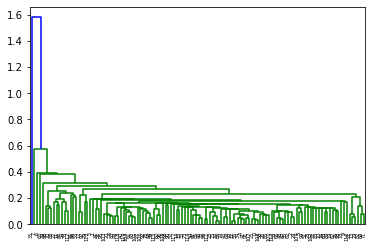

In [60]:
# Single linkage

mergings = linkage(df_hc, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

**Complete Linkage**

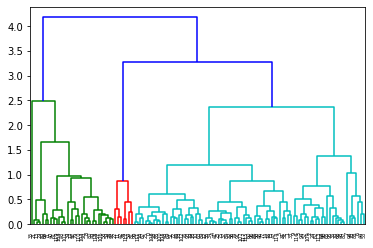

In [61]:
# Complete Linkage

mergings = linkage(df_hc, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [62]:
# Let cut the tree at height of approx 3 to get 3 clusters and see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
df_hc = df_hc.reset_index()
df_hc.insert(4,"Cluster_Id",clusterCut)
df_hc = df_hc.set_index("country", drop=True)
df_hc.head(10)

,gdpp,child_mort,income,Cluster_Id
country,,,,
Albania,-0.485623,-0.538949,-0.375369,0
Algeria,-0.465376,-0.272833,-0.220844,0
Antigua and Barbuda,-0.041817,-0.695634,0.101732,0
Argentina,-0.145791,-0.591177,0.080920,0
Armenia,-0.533233,-0.501643,-0.543421,0
Azerbaijan,-0.389857,0.023128,-0.059556,0
Bahamas,0.822811,-0.608587,0.299440,0
Bahrain,0.423331,-0.737914,1.246357,0
Bangladesh,-0.667961,0.276809,-0.765062,1


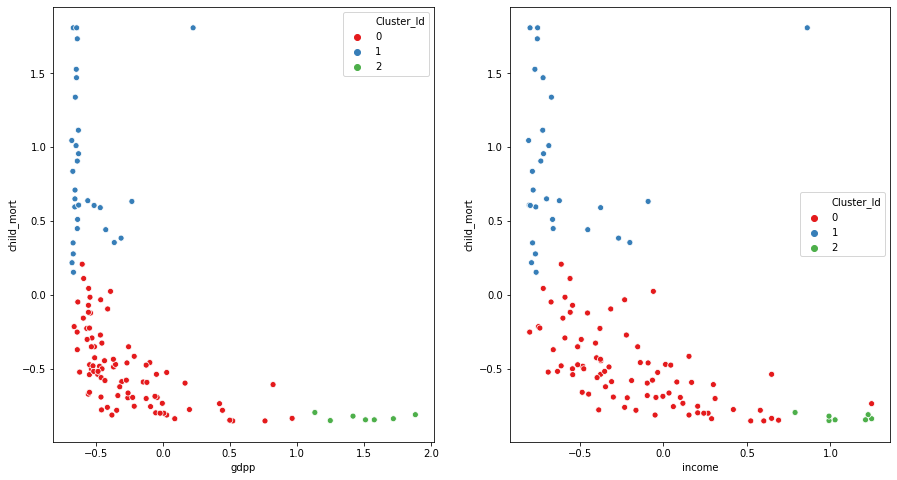

In [63]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,8))

sns.scatterplot(x='gdpp',y='child_mort',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[0])
sns.scatterplot(x='income',y='child_mort',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[1])
plt.show()

### Hierarchical clustering with 4 clusters

In [64]:
# Let cut the tree at height of approx 3 to get 4 clusters and see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_hc = df_hc.reset_index()
df_hc.insert(5,"Cluster_Id4",clusterCut)
df_hc = df_hc.set_index("country", drop=True)
df_hc.head(10)

,gdpp,child_mort,income,Cluster_Id,Cluster_Id4
country,,,,,
Albania,-0.485623,-0.538949,-0.375369,0,0
Algeria,-0.465376,-0.272833,-0.220844,0,0
Antigua and Barbuda,-0.041817,-0.695634,0.101732,0,0
Argentina,-0.145791,-0.591177,0.080920,0,0
Armenia,-0.533233,-0.501643,-0.543421,0,0
Azerbaijan,-0.389857,0.023128,-0.059556,0,0
Bahamas,0.822811,-0.608587,0.299440,0,0
Bahrain,0.423331,-0.737914,1.246357,0,0
Bangladesh,-0.667961,0.276809,-0.765062,1,1


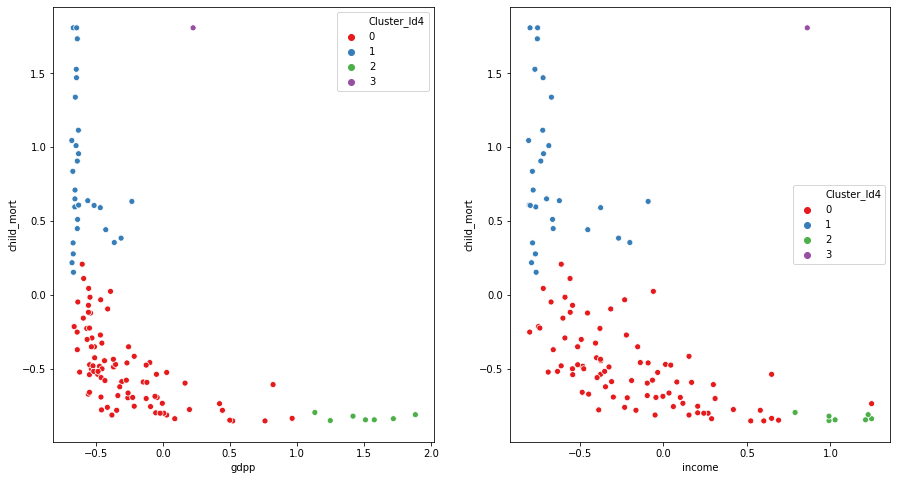

In [65]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,8))

sns.scatterplot(x='gdpp',y='child_mort',hue='Cluster_Id4',legend='full',palette="Set1",data=df_hc,ax=axes[0])
sns.scatterplot(x='income',y='child_mort',hue='Cluster_Id4',legend='full',palette="Set1",data=df_hc,ax=axes[1])
plt.show()

**Inference:**
We can see from the complete linkage diagram why the cluster number=4 will not work. Let's try for 5 clusters and see if there any significant changes.

### Hierarchical clustering with 5 clusters

In [66]:
# Let cut the tree at height of approx 3 to get 5 clusters and see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_hc = df_hc.reset_index()
df_hc.insert(6,"Cluster_Id5",clusterCut)
df_hc = df_hc.set_index("country", drop=True)
df_hc.head(10)

,gdpp,child_mort,income,Cluster_Id,Cluster_Id4,Cluster_Id5
country,,,,,,
Albania,-0.485623,-0.538949,-0.375369,0,0,0
Algeria,-0.465376,-0.272833,-0.220844,0,0,0
Antigua and Barbuda,-0.041817,-0.695634,0.101732,0,0,1
Argentina,-0.145791,-0.591177,0.080920,0,0,1
Armenia,-0.533233,-0.501643,-0.543421,0,0,0
Azerbaijan,-0.389857,0.023128,-0.059556,0,0,0
Bahamas,0.822811,-0.608587,0.299440,0,0,1
Bahrain,0.423331,-0.737914,1.246357,0,0,1
Bangladesh,-0.667961,0.276809,-0.765062,1,1,2


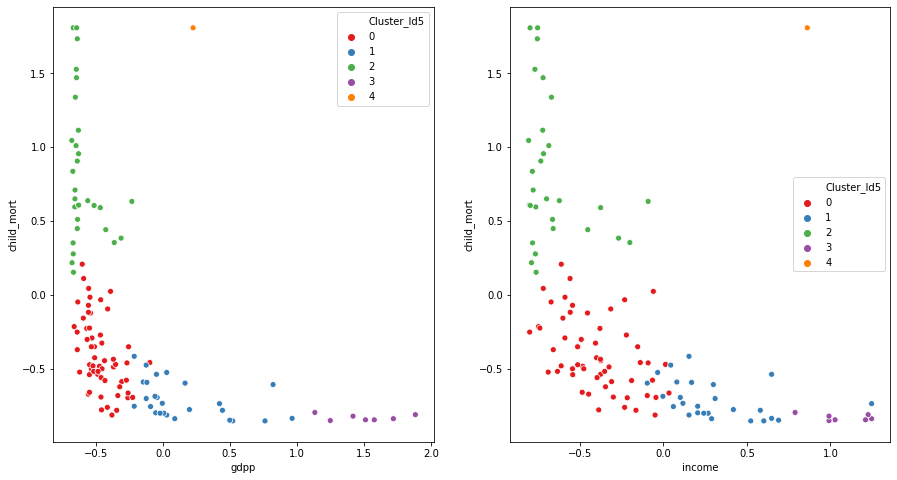

In [67]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,8))

sns.scatterplot(x='gdpp',y='child_mort',hue='Cluster_Id5',legend='full',palette="Set1",data=df_hc,ax=axes[0])
sns.scatterplot(x='income',y='child_mort',hue='Cluster_Id5',legend='full',palette="Set1",data=df_hc,ax=axes[1])
plt.show()

**Inference:**
1. If we look closely at the scatter plots for cluster_num = 3, 4, 5 we'll notice that the region-of-concern for us, which the high child mortality rate and low gdp per capita and income, remains almost unchanged (except for the single outlier point which changes its cluster).

2. We shall move forward with the cluster_number = 3 as it looks clean, precise and remains unchanged even when cluster_number is 4 or 5.

**We have analyzed both K-means and Hierarchial clustering and found clusters formed are not identical. The clusters formed in both the cases are not that great but its better in K-means as compared to Hierarchial. So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.**

In [68]:
# Merging the df_hc with original df

df_merge_hc = pd.merge(df ,df_hc,on='country', how="inner")
df_merge_hc = df_merge_hc.drop(["gdpp_y", "child_mort_y", "income_y", "Cluster_Id4", "Cluster_Id5"], axis=1)
df_merge_hc.columns = ['country','child_mort','exports','health','imports',
                            'income','inflation','life_expec','total_fer','gdpp','Cluster_Id']
df_merge_hc.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,0
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,0
3,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300,0
4,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,0
5,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,0
6,Bahamas,13.8,9800.00,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,0
7,Bahrain,8.6,14386.50,1028.7900,10536.300,41100,7.440,76.0,2.16,20700,0
8,Bangladesh,49.4,121.28,26.6816,165.244,2440,7.140,70.4,2.33,758,1
9,Barbados,14.2,6320.00,1275.2000,7792.000,15300,0.321,76.7,1.78,16000,0


## Final Analysis

In [69]:
df_clus0 = df_merge_kmeans[df_merge_kmeans["Cluster_Id"] == 0]
df_clus4 = df_merge_kmeans[df_merge_kmeans["Cluster_Id"] == 4]
df_clus3 = df_merge_kmeans[df_merge_kmeans["Cluster_Id"] == 3]
df_total = df_clus0.append(df_clus4).append(df_clus3)
df_total.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,43.375000,1381.749757,199.025604,1518.036646,7038.552632,8.733763,68.221053,3.173816,3309.092105,2.631579
std,27.869592,1908.599604,161.046574,1393.715717,4898.897210,7.282774,6.525158,1.218319,2567.464717,1.824588
min,6.900000,1.076920,19.463600,0.651092,1660.000000,0.480000,46.500000,1.270000,562.000000,0.000000
25%,20.025000,434.401500,68.251000,591.472500,3310.000000,3.770000,64.975000,2.315000,1310.000000,0.000000
50%,34.900000,918.880000,159.738500,1248.225000,6430.000000,6.875000,69.350000,2.780000,2965.000000,4.000000
75%,62.300000,1722.995000,282.828750,2007.435000,9875.000000,12.200000,73.150000,3.952500,4510.000000,4.000000
max,111.000000,14671.800000,766.080000,10071.900000,33700.000000,39.200000,77.900000,6.230000,17100.000000,4.000000


In [70]:
df_total.shape

(76, 11)

**We have removed few countries during outlier treatment but we might have dropped some countries which might be in need of help. Let's iterate our final list based on the information from the clusters which were in need of aid.**

In [71]:
# Based on final clusters information we are going to deduce the final list.
# We observed that mean child mortality is 44 for the selected clusters and hence 
# let's take all the countries with more than this child mortality .

df_final_list = df[df['child_mort']>44]
df_final_list.shape

(54, 10)

In [72]:
# Let's check the demographic of the resultant data again

df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,88.098148,833.498473,100.929798,766.994668,3798.759259,11.357315,60.398148,4.688704,1805.259259
std,33.624971,2158.512544,153.295528,1467.879627,5205.592345,14.583901,6.824747,1.262186,2774.379701
min,44.400000,1.076920,12.821200,0.651092,609.000000,0.885000,32.100000,2.330000,231.000000
25%,62.300000,102.121250,31.954250,192.802500,1412.500000,3.940000,57.150000,3.660000,562.250000
50%,82.050000,188.290000,46.213750,339.306000,2100.000000,8.785000,60.600000,4.965000,841.500000
75%,110.500000,452.041500,81.591000,591.472500,3915.000000,14.825000,65.450000,5.422500,1432.500000
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.600000,7.490000,17100.000000


In [73]:
# We observed that mean income is 3799 for the selected clusters and hence 
# let's take all the countries with less than this income .

df_final_list1 = df_final_list[df_final_list['income']<=3799]
df_final_list1.shape

(40, 10)

In [74]:
# Let's check the demographic of the resultant data again

df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,92.820000,184.772688,53.969303,340.892052,1838.325000,8.552375,59.610000,4.939500,823.850000
std,34.626921,159.015179,53.676231,270.834253,799.812298,6.433847,7.310646,1.195633,568.505127
min,44.400000,1.076920,12.821200,0.651092,609.000000,0.885000,32.100000,2.330000,231.000000
25%,64.200000,78.714000,30.870525,170.192500,1317.500000,3.082500,56.450000,4.475000,486.500000
50%,89.750000,129.079500,41.275750,251.534000,1695.000000,6.925000,59.400000,5.085000,682.000000
75%,111.000000,212.376750,54.357125,409.328500,2395.000000,12.350000,64.825000,5.597500,991.000000
max,208.000000,617.320000,328.320000,1190.510000,3720.000000,26.500000,71.100000,7.490000,3600.000000


In [75]:
# We observed that mean gdpp is 823 for the selected clusters and hence 
# let's take all the countries with less than this gdpp .

df_final_list2 = df_final_list1[df_final_list1['gdpp']<=823]
df_final_list2.shape

(27, 10)

### Final List of countries which are in need of the aid based on socio-economic factors.

In [76]:
df_final_list2['country']

0                   Afghanistan
12                   Bangladesh
17                        Benin
25                 Burkina Faso
26                      Burundi
27                     Cambodia
31     Central African Republic
36                      Comoros
37             Congo, Dem. Rep.
50                      Eritrea
56                       Gambia
63                       Guinea
64                Guinea-Bissau
66                        Haiti
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
106                  Mozambique
109                       Nepal
112                       Niger
126                      Rwanda
132                Sierra Leone
146                  Tajikistan
147                    Tanzania
150                        Togo
155                      Uganda
Name: country, dtype: object

**Some final figures to highlight**

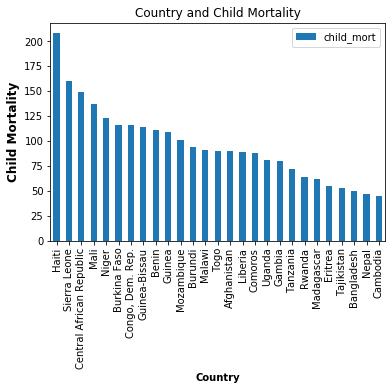

In [77]:
# BarPlot for Child Mortality of countries which are in need of aid

df_list_cm = pd.DataFrame(df_final_list2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

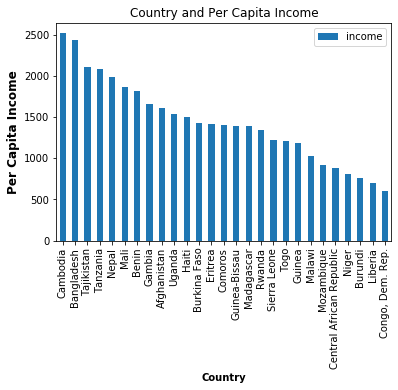

In [78]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(df_final_list2.groupby(['country'])['income'].mean().sort_values(ascending = False))
df_list_in.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

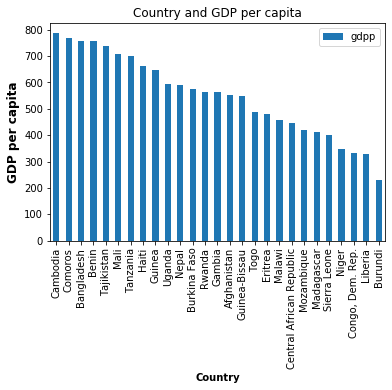

In [79]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_gdp = pd.DataFrame(df_final_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = False))
df_list_gdp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

# The final recommended country list for receiving aid.

In [80]:
# Final countries list
df_final_list2.reset_index(drop=True).country

0                  Afghanistan
1                   Bangladesh
2                        Benin
3                 Burkina Faso
4                      Burundi
5                     Cambodia
6     Central African Republic
7                      Comoros
8             Congo, Dem. Rep.
9                      Eritrea
10                      Gambia
11                      Guinea
12               Guinea-Bissau
13                       Haiti
14                     Liberia
15                  Madagascar
16                      Malawi
17                        Mali
18                  Mozambique
19                       Nepal
20                       Niger
21                      Rwanda
22                Sierra Leone
23                  Tajikistan
24                    Tanzania
25                        Togo
26                      Uganda
Name: country, dtype: object

**Final recommendations:**
1. As shown above are the countries with major need of aid based on socio-economic factors.

2. The process revolved around the K-Means Cluster analysis (for k=3, 4, 5) and Hierarchical clustering (for cluster numbers = 3, 4, 5). We chose k=5 as appropriate for the final analysis (cluster number = 3, with complete linkage was second best).

3. Finally we elimated countries from the original list (df) based on statistics (mean of "child_mort", "income" and "gdpp") generated from the final K-Means list (df_total). The prior helped us re-consider eliminated countries due to outlier analysis